In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans

Importar dataset de winequality-red.csv.

In [5]:
data = pd.read_csv("winequality-red.csv", sep = ";")

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
print(data.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [11]:
X = data.copy()

### PCA

Estandarizar los datos

In [13]:
media = X.mean()
desvio = X.std()

In [15]:
X_estandar = (X - media) / desvio
X_estandar

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,-0.787576
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,-0.787576
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0.450707
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271,-0.787576
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136,0.450707
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460,0.450707
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243,-0.787576


Aplicar PCA con todas las componentes principales y obtener las columnas transformadas

In [23]:
modelo = PCA(n_components = 12)
modelo

PCA(n_components=12)

In [24]:
X_pca = modelo.fit_transform(X_estandar)

Transformar columnas transformadas a DataFrame y calcular matriz de correlación de la misma (es el output de pca.fit_transform). Redondear a 2 decimales

In [34]:
X_pca_tabla = pd.DataFrame(
    X_pca,
    columns = [f"PC{i+1}" for i in range(X_pca.shape[1])]
)

In [37]:
correlacion_pca = X_pca_tabla.corr().round(2)

In [38]:
correlacion_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
PC1,1.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
PC2,0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0
PC3,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
PC4,-0.0,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0
PC5,0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
PC6,0.0,-0.0,0.0,0.0,0.0,1.0,-0.0,0.0,0.0,0.0,-0.0,0.0
PC7,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0
PC8,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0
PC9,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0
PC10,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0


Mostrar cuanta variabilidad explica cada una de las variables y seleccionar la cantidad de componentes principales necesarias para explicar por lo menos el 75% de la variablidad 

In [39]:
modelo.explained_variance_ratio_.cumsum()

array([0.26009731, 0.44692081, 0.58716412, 0.68841586, 0.76952116,
       0.82473718, 0.87626366, 0.91841971, 0.95269534, 0.98002195,
       0.99504017, 1.        ])

In [40]:
X_pca_tabla.drop(columns = X_pca_tabla.columns[5:], inplace = True)

In [85]:
X_pca_tabla

,PC1,PC2,PC3,PC4,PC5
0,-1.778885,-1.156941,-1.386147,-0.044930,0.233811
1,-1.003871,-2.071190,0.007756,0.465974,0.182397
2,-0.915497,-1.392998,-0.699068,0.345184,0.095180
3,2.403325,0.213725,0.066360,-0.888904,-1.524265
4,-1.778885,-1.156941,-1.386147,-0.044930,0.233811
...,...,...,...,...,...
1594,-2.241290,-0.599407,0.795579,0.440921,-0.312883
1595,-2.121792,0.369985,2.137870,0.454422,0.104092
1596,-1.365838,0.517399,1.250305,0.514344,0.195854
1597,-2.366406,-0.703325,0.899201,0.661749,0.021373


Crear una variable data_clean que contenga una tabla con todas las componentes principales seleccionadas

In [42]:
data_clean = X_pca_tabla.copy()

In [43]:
data_clean

,PC1,PC2,PC3,PC4,PC5
0,-1.778885,-1.156941,-1.386147,-0.044930,0.233811
1,-1.003871,-2.071190,0.007756,0.465974,0.182397
2,-0.915497,-1.392998,-0.699068,0.345184,0.095180
3,2.403325,0.213725,0.066360,-0.888904,-1.524265
4,-1.778885,-1.156941,-1.386147,-0.044930,0.233811
...,...,...,...,...,...
1594,-2.241290,-0.599407,0.795579,0.440921,-0.312883
1595,-2.121792,0.369985,2.137870,0.454422,0.104092
1596,-1.365838,0.517399,1.250305,0.514344,0.195854
1597,-2.366406,-0.703325,0.899201,0.661749,0.021373


### Extra: Clusterizar los datos

Realizar K-Means para clusterizar los datos. Usar 5 clusters

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def mejor_n_clusters(data, min_k, max_k):
    mejor_k = None
    mejor_score = -1

    for k in range(min_k, max_k + 1):
        modelo_kmeans = KMeans(
            n_clusters=k,
            n_init=10,
            max_iter=300,
            random_state=0
        )
        
        # Se entrena el modelo y se obtienen las etiquetas
        labels = modelo_kmeans.fit_predict(data)
        
        # Se calcula el silhouette score
        score = silhouette_score(data, labels)
        
        print(f"{k} clusters = Silhouette Score: {score:.4f}")
        
        # Guardamos el mejor k
        if score > mejor_score:
            mejor_score = score
            mejor_k = k

    print(f"\nMejor número de clusters: {mejor_k} con Silhouette Score: {mejor_score:.4f}")


In [63]:
mejor_n_clusters(data_clean, 2,30)

2 clusters = Silhouette Score: 0.4452
3 clusters = Silhouette Score: 0.3984
4 clusters = Silhouette Score: 0.4088
5 clusters = Silhouette Score: 0.4290
6 clusters = Silhouette Score: 0.4452
7 clusters = Silhouette Score: 0.4497
8 clusters = Silhouette Score: 0.3525
9 clusters = Silhouette Score: 0.3571
10 clusters = Silhouette Score: 0.3446
11 clusters = Silhouette Score: 0.3215
12 clusters = Silhouette Score: 0.2841
13 clusters = Silhouette Score: 0.2551
14 clusters = Silhouette Score: 0.2414
15 clusters = Silhouette Score: 0.2297
16 clusters = Silhouette Score: 0.2369
17 clusters = Silhouette Score: 0.2248
18 clusters = Silhouette Score: 0.2226
19 clusters = Silhouette Score: 0.2103
20 clusters = Silhouette Score: 0.2358
21 clusters = Silhouette Score: 0.2197
22 clusters = Silhouette Score: 0.2290
23 clusters = Silhouette Score: 0.2103
24 clusters = Silhouette Score: 0.2094
25 clusters = Silhouette Score: 0.2159
26 clusters = Silhouette Score: 0.2124
27 clusters = Silhouette Score: 0

In [88]:
modelo_kmeans = KMeans(
    n_clusters = 7,
    n_init = 10,
    max_iter = 300
)
modelo_kmeans.fit(data_clean)

KMeans(n_clusters=7, n_init=10)

Con el método del codo analizar la cantidad óptima de clusters a seleccionar

In [86]:
acum = []
for i in range(1,11):
    modelo_kmeans = KMeans(
        n_clusters = i,
        n_init = 10,
        max_iter = 300
    )
    modelo_kmeans.fit(data_clean)
    acum.append([i, modelo_kmeans.inertia_])

<Axes: >

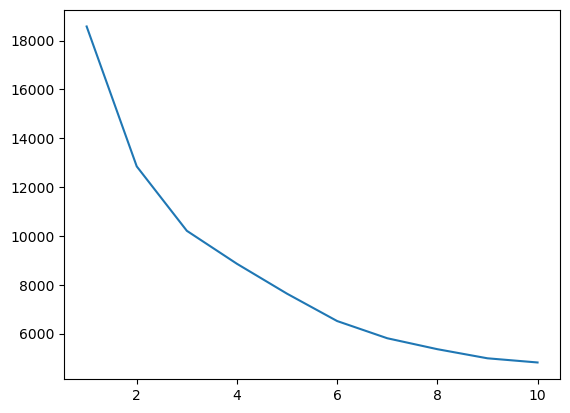

In [87]:
sns.lineplot(
    x = np.array(acum)[:,0], # numero de cluster
    y = np.array(acum)[:, 1] # error cada cluster
)

In [89]:
data_clean["cluster"] = modelo_kmeans.labels_

<Axes: xlabel='PC1', ylabel='PC2'>

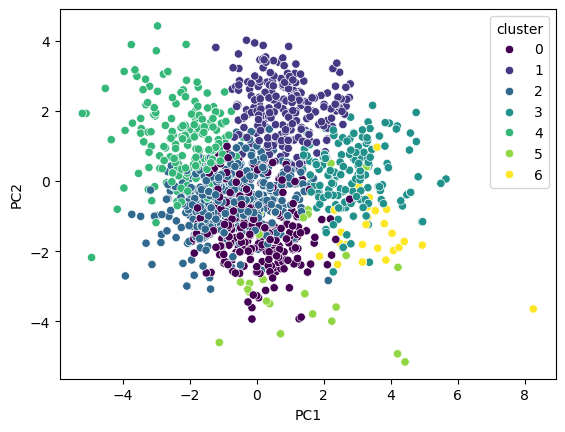

In [90]:
sns.scatterplot(
    data=data_clean, 
    x="PC1",
    y="PC2",
    hue="cluster",
    palette="viridis"
)

In [92]:
data["cluster"] = modelo_kmeans.labels_

In [93]:
data.groupby("cluster").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,8.080126,0.531073,0.279180,2.523344,0.085407,27.276025,87.968454,0.997077,3.297445,0.631861,9.863617,5.283912
1,8.866790,0.345701,0.428672,2.389852,0.076550,12.457565,28.741697,0.995866,3.267970,0.738635,11.498893,6.509225
2,7.789636,0.627464,0.153036,2.254182,0.085756,10.922727,34.136364,0.996906,3.350727,0.592145,9.870333,5.216364
3,11.630645,0.424731,0.532634,2.852688,0.089935,10.983871,33.274194,0.999285,3.132957,0.716452,10.331004,5.790323
4,6.465258,0.586808,0.091831,2.202817,0.068676,17.431925,39.417840,0.994342,3.482488,0.628920,11.586072,6.042254
5,8.142424,0.528939,0.348485,9.548485,0.101030,35.121212,105.060606,0.999059,3.263333,0.655758,10.009091,5.606061
6,8.462069,0.531034,0.493793,1.975862,0.351172,15.137931,62.068966,0.997097,3.050690,1.288621,9.482759,5.344828
